In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
from tqdm import tqdm
import seaborn as sns

import math
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
import pandas as pd

N = 20001

fname = f'Jaffe_{N-1}_out_perturber.txt'

M = 1
m = M/N
Rs = 1
M_p = M/10

rho_0 = M / (4 * np.pi * (Rs)**3)

# Fetch Data

In [124]:
data = pd.read_csv(fname, names=list(range(7)), sep = ' ')
datas = np.array(data)

In [125]:
def dati (data,N,M_tot,M_p):

    x = []
    y = []
    z = []
    
    v_x = []
    v_y = []
    v_z = []
    
    start = N + 3
    step  = N * 3 + 3
    
    a = (np.array([data.iloc[i::step,:].copy() for i in range(start,start+N)]))
    for j in range(len(a)):
        temp = np.array([a[j][i][~np.isnan(a[j][i])] for i in range(len(a[j]))])
        
        x.append(temp[:,0])
        y.append(temp[:,1])
        z.append(temp[:,2])
        
    x = np.array(x)
    y = np.array(y)
    z = np.array(z)
    
    
    b = (np.array([data.iloc[i::step,:].copy() for i in range(start+N,start+(N)*2)]))
    
    for j in range(len(b)):
        temp = np.array([b[j][i][~np.isnan(b[j][i])] for i in range(len(b[j]))])
        
        v_x.append(temp[:,0])
        v_y.append(temp[:,1])
        v_z.append(temp[:,2])
     

    v_x = np.array(v_x)
    v_y = np.array(v_y)
    v_z = np.array(v_z)
    
    #cm
    cm_x = []
    cm_y = []
    cm_z = []
    
    for i in range (len(x[0])):
        
        '''
        # Centro di massa del sistema Jaffe + Perturber
        cm_x.append(((np.sum(x.T[i,1:])*M_tot/(N-1))+x.T[i,0]*M_p)/(M_tot+M_p))
        cm_y.append(((np.sum(y.T[i,1:])*M_tot/(N-1))+y.T[i,0]*M_p)/(M_tot+M_p))
        cm_z.append(((np.sum(z.T[i,1:])*M_tot/(N-1))+z.T[i,0]*M_p)/(M_tot+M_p))
        
        '''
        
        # Centro di Massa del sistema di 20000 particelle
        cm_x.append(((np.sum(x.T[i,1:])*M_tot)/(N-1))/(M_tot))
        cm_y.append(((np.sum(y.T[i,1:])*M_tot)/(N-1))/(M_tot))
        cm_z.append(((np.sum(z.T[i,1:])*M_tot)/(N-1))/(M_tot))
        
  
    print('The initial center of mass is (', cm_x[0],', ', cm_y[0],', ', cm_z[0], ')')  
    print('The final center of mass is (', cm_x[-1],', ', cm_y[-1],', ', cm_z[-1], ')')
    
    '''
    x = x - cm_x
    y = y - cm_y
    z = z - cm_z
    '''
    
    cm_v_x = []
    cm_v_y = []
    cm_v_z = []
    
    for i in range (len(x[0])):
        
        '''
        #Velocità del centro di massa Jaffe+Perturber
        cm_v_x.append(((np.sum(v_x.T[i,1:])*M_tot/(N-1))+v_x.T[i,0]*M_p)/(M_tot+M_p))
        cm_v_y.append(((np.sum(v_y.T[i,1:])*M_tot/(N-1))+v_y.T[i,0]*M_p)/(M_tot+M_p))
        cm_v_z.append(((np.sum(v_z.T[i,1:])*M_tot/(N-1))+v_z.T[i,0]*M_p)/(M_tot+M_p))
    
        '''
        # Velocità del centro di massa Jaffe
        cm_v_x.append(((np.sum(v_x.T[i,1:])*M_tot/(N-1)))/(M_tot))
        cm_v_y.append(((np.sum(v_y.T[i,1:])*M_tot/(N-1)))/(M_tot))
        cm_v_z.append(((np.sum(v_z.T[i,1:])*M_tot/(N-1)))/(M_tot))
        
    '''
    v_x = v_x - cm_v_x
    v_y = v_y - cm_v_y
    v_z = v_z - cm_v_z
    '''
    
    r    = np.array([(x[i]**2+y[i]**2+z[i]**2)**0.5 for i in range(N)])
    cm_r = np.array([(cm_x[i]**2+cm_y[i]**2+cm_z[i]**2)**0.5 for i in range(len(cm_x))])
    
    t = (np.array(data.iloc[2::step,:].copy()))[:,2]
    
    return x,y,z,cm_x, cm_y, cm_z,v_x,v_y,v_z,cm_v_x,cm_v_y,cm_v_z,r,cm_r,t

In [126]:
x,y,z,cm_x,cm_y,cm_z,v_x,v_y,v_z,cm_vx,cm_vy,cm_vz,r,r_cm,time = dati(data, N, M, M_p)

The initial center of mass is ( -0.10334916342625834 ,  -0.2508368876806177 ,  -0.7323529526198608 )
The final center of mass is ( -0.1782650952451566 ,  0.6537487816525166 ,  -0.8118648917410825 )


In [127]:
x[0][0]

0.89999998

Let's see how de distribution of particles and the position of the perturber evolves with time (projected on one plane)

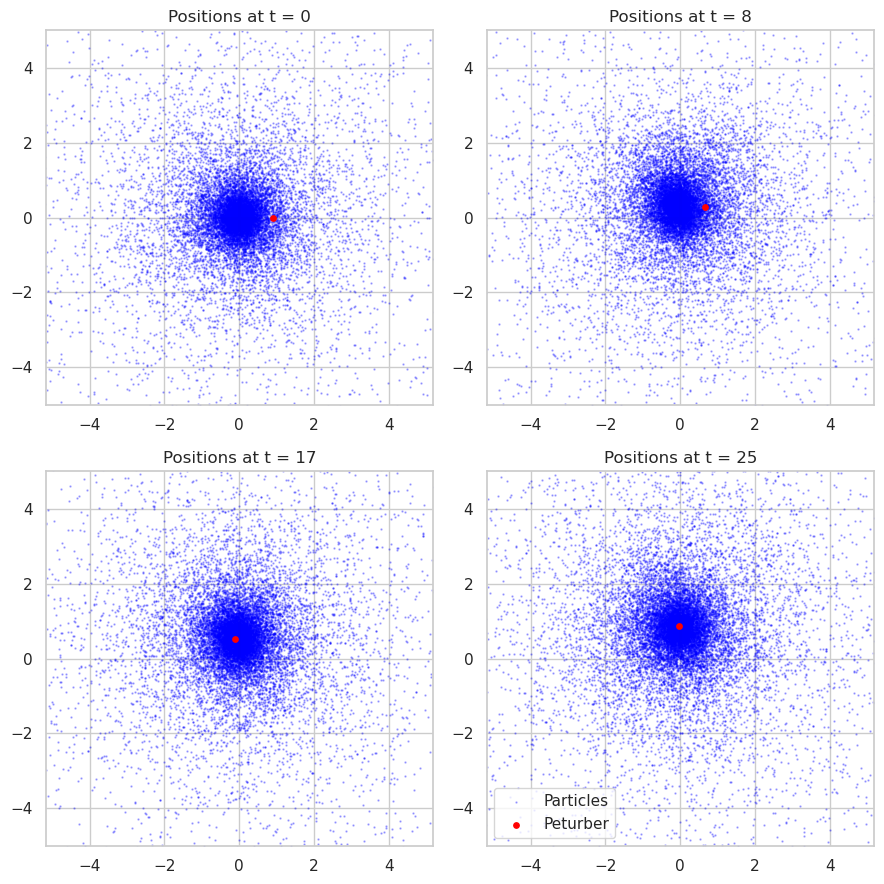

In [128]:
t0  = 0
t1 = int(np.round(len(time) * 1 / 4))
t2 = int(np.round(len(time) * 2 / 4))
t3 = int(np.round(len(time) * 3 / 4))

# Set Seaborn style
sns.set(style='whitegrid')

fig, ax = plt.subplots(2, 2, tight_layout=True, figsize=(9,9))

# Plot 1
ax[0][0].scatter(x[1:, t0], y[1:, t0], c='blue', alpha=0.3, s=0.5, label='Particles')
ax[0][0].scatter(x[0][t0], y[0][t0], c='red', alpha=1, s=15, label='Peturber')
ax[0][0].set_title(f'Positions at t = {int(np.round(time[t0]))}')
ax[0][0].axis('equal')
#ax[0][0].legend(fontsize='large')
ax[0][0].set_xlim(-5, 5)
ax[0][0].set_ylim(-5, 5)


# Plot 2
ax[0][1].scatter(x[1:, t1], y[1:, t1], c='blue', alpha=0.3, s=0.5, label='Particles')
ax[0][1].scatter(x[0][t1], y[0][t1], c='red', alpha=1, s=15, label='Peturber')
ax[0][1].set_title(f'Positions at t = {int(np.round(time[t1]))}')
ax[0][1].axis('equal')
#ax[0][1].legend(fontsize='large')
ax[0][1].set_xlim(-5, 5)
ax[0][1].set_ylim(-5, 5)


# Plot 3
ax[1][0].scatter(x[1:, t2], y[1:, t2], c='blue', alpha=0.3, s=0.5, label='Particles')
ax[1][0].scatter(x[0][t2], y[0][t2], c='red', alpha=1, s=15, label='Peturber')
ax[1][0].set_title(f'Positions at t = {int(np.round(time[t2]))}')
ax[1][0].axis('equal')
#ax[1][0].legend(fontsize='large')
ax[1][0].set_xlim(-5, 5)
ax[1][0].set_ylim(-5, 5)

# Plot 4
ax[1][1].scatter(x[1:, t3], y[1:, t3], color='blue', alpha=0.3, s=0.5, label='Particles')
ax[1][1].scatter(x[0][t3], y[0][t3], c='red', alpha=1, s=15, label='Peturber')
ax[1][1].set_title(f'Positions at t = {int(np.round(time[t3]))}')
ax[1][1].axis('equal')
ax[1][1].legend()
ax[1][1].set_xlim(-5, 5)
ax[1][1].set_ylim(-5, 5)

plt.show()

## Radius of the perturber

Text(0.5, 1.0, 'Radial coordinate of the perturber')

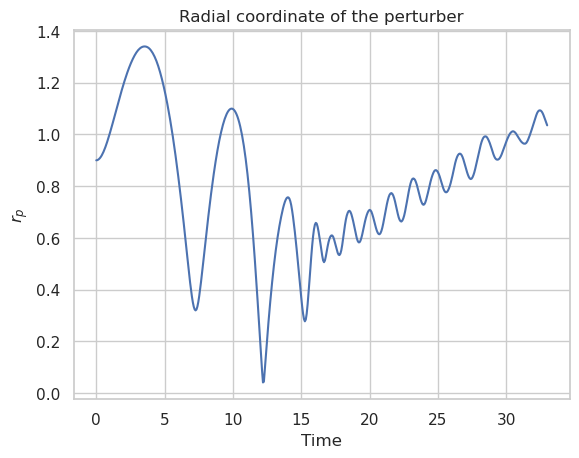

In [129]:
plt.plot(time, np.abs(r[0]))
plt.xlabel('Time')
plt.ylabel(r'$r_p$')
plt.title('Radial coordinate of the perturber')

### Let's compute the distance of the perturber from the center of mass of the distribution

Text(0.5, 1.0, 'Radial coordinate of the perturber with respect to the CM')

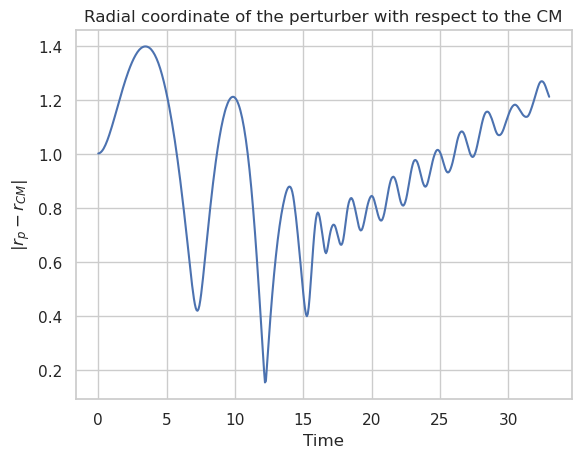

In [130]:
plt.plot(time, np.abs(r[0]-cm_x))
plt.xlabel('Time')
plt.ylabel(r'$|r_p-r_{CM}|$')
plt.title('Radial coordinate of the perturber with respect to the CM')

## Trajectory of the perturber

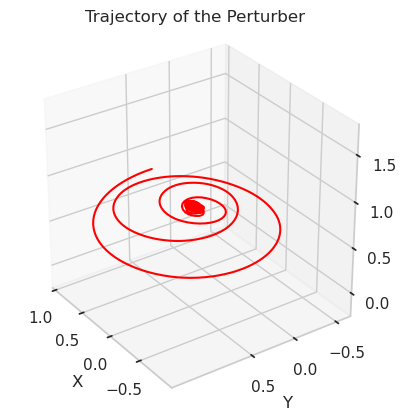

In [131]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set(aspect='equal')
#ax.plot3D(x_1, y_1, z_1, 'blue')
ax.plot(x[0]-cm_x, y[0]-cm_y, z[0]-cm_z, 'red')
#plt.title('Two-Body Orbit')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xticks(np.arange(-0.5, 1.5, 0.5))
ax.set_yticks(np.arange(-1, 1, 0.5))
ax.set_zticks(np.arange(0, 2, 0.5))

neg = -1
pos = 1

ax.axes.set_xlim3d(left=x[0][-1]-cm_x[-1]-1, right=x[0][-1]-cm_x[-1]+1) 
ax.axes.set_ylim3d(bottom=y[0][-1]-cm_y[-1]-1, top=y[0][-1]-cm_y[-1]+1) 
ax.axes.set_zlim3d(bottom=z[0][-1]-cm_z[-1]-1, top=z[0][-1]-cm_z[-1]+1)


ax.view_init(30, 145)  # Changing viewing angle (adjust as needed)
#plt.savefig('dyf_3D.png')
plt.title('Trajectory of the Perturber')
plt.show()

Let's try to visualize the trajectory of the perturber on the x-y plane!

Text(0.5, 1.0, 'Projected Perturber Orbit')

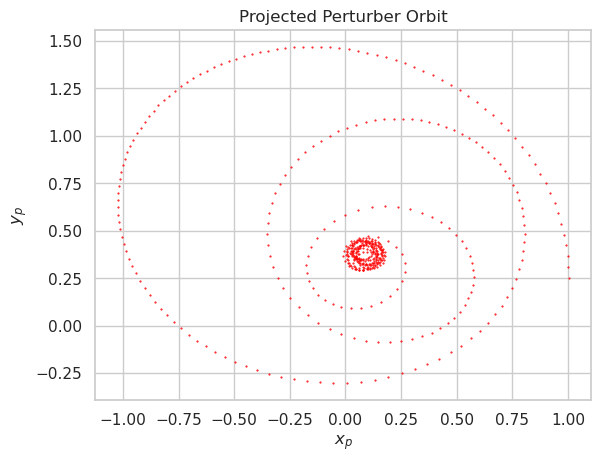

In [132]:
plt.scatter(x[0]-cm_x, y[0]-cm_y, marker='.', s=1, color='red')
plt.xlabel(r'$x_p$')
plt.ylabel(r'$y_p$')
plt.title('Projected Perturber Orbit')

In [133]:
ampiezze = np.sqrt((x[0]-cm_x)**2 + (y[0]-cm_y)**2)

Text(0, 0.5, 'Orbital Amplitude')

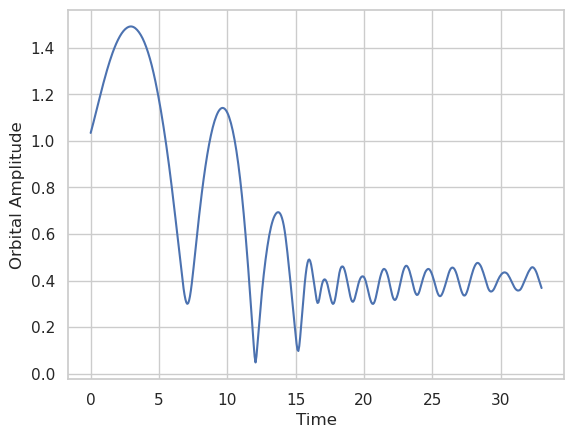

In [134]:
plt.plot(time, ampiezze)
plt.xlabel('Time')
plt.ylabel('Orbital Amplitude')

# Lagrangian Radii


100%|█████████████████████████████████████████████| 8/8 [00:04<00:00,  1.64it/s]


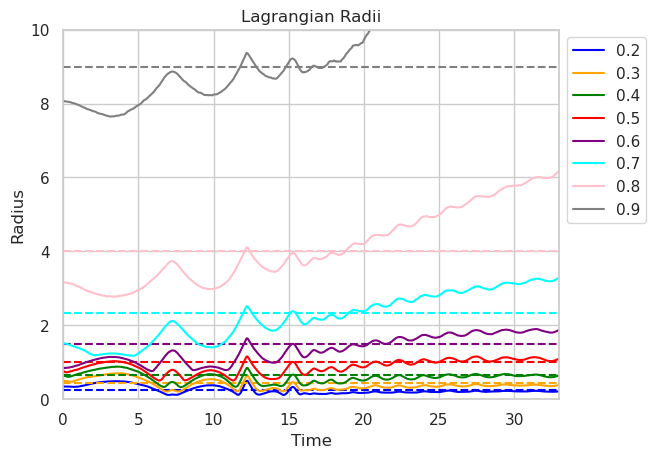

In [146]:
perc = [0.2,0.3,0.4,0.5,0.6,0.7, 0.8, 0.9]
colors = ['blue', 'orange', 'green', 'red', 'purple', 'cyan', 'pink', 'grey']

for p, c in tqdm(zip(perc, colors), total=len(perc)):
    r_L = []
    for i in range(len(time)):
        a    = np.sort(abs(r[1:,i]-r[0][i]))
        mask = a<np.quantile(a,p)
        r_L.append(np.max(a[mask]))
    #Plot it
    r_L = np.array(r_L)
    R_teo = Rs * p / (1 - p)
    plt.plot(time,r_L, color=c, label=str(p))
    plt.axhline(y = R_teo, color=c, linestyle='--')


'''for i in range(0, N, 100):
    plt.plot(time,r[i], alpha=0.1)
'''
plt.ylim(0,10)
plt.xlim(0, np.max(time))
plt.xlabel('Time')
plt.ylabel('Radius')
plt.title('Lagrangian Radii')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
#plt.savefig(f'Plots/Lagrangian Radii {N} teo.png' )

# Energy

In [136]:
from scipy import linalg

In [137]:
energy_file = f'Jaffe_log_perturber_{N-1}.txt'

In [138]:
en_data = pd.read_csv(energy_file, header=None).to_numpy()
datas   = pd.read_csv(energy_file, header=None)
en_data.shape

(4463, 1)

In [139]:
datas

,0
0,Hierarchical N-body code (theta scan)
1,nbody dtime eps theta usequ...
2,20001 0.03333 0.0059 0.20 fal...
3,\t rsize tdepth ftree actmax nbbtot ...
4,\t 32768.0 28 3.051 21796 132169392 ...
...,...
4458,\t rsize tdepth ftree actmax nbbtot ...
4459,\t 32768.0 23 3.051 20664 127577959 ...
4460,time |T+U| T -U -T/U ...
4461,33.000 0.26256 0.51508 0.25252 2.03977 0...


In [140]:
####### remove some lines from the dataset###########
# Prento tutte le righe che contengono la parola 'time' e prendo la riga successiva
raws_to_keep = []

for i in range(0, len(en_data)):
    if '        time' in en_data[i][0]:
        raws_to_keep.append(i+1)

raws_to_keep = np.array(raws_to_keep)

In [141]:
good_data = []
for index in raws_to_keep:
    good_data.append(en_data[index])

good_data = np.array(good_data)

In [142]:
times_energy = []
kinetic = []
potential = []

for i in range (0, len(good_data)):
    times_energy.append(float(good_data[i][0][6:12]))
    kinetic.append(float(good_data[i][0][21:28]))
    potential.append(float(good_data[i][0][30:36]))
                    

en_times = np.array(times_energy)
T = np.array(kinetic)
U = -np.array(potential)
E_tot = T + U

E_med = np.average(E_tot)
E_stdev = np.std(E_tot)

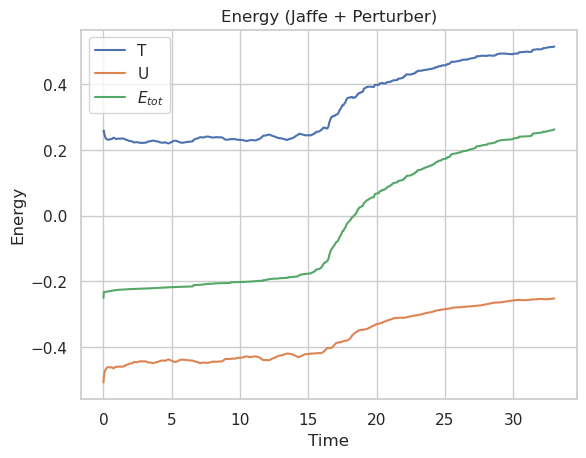

In [143]:
plt.plot(en_times, T, label='T')
plt.plot(en_times, U, label='U')
plt.plot(en_times, E_tot, label=r'$E_{tot}$')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Energy (Jaffe + Perturber)')

plt.legend()

# Animation

  0%|          | 0/495 [00:00<?, ?it/s]

Animation size has reached 105118157 bytes, exceeding the limit of 104857600.0. If you're sure you want a larger animation embedded, set the animation.embed_limit rc parameter to a larger value (in MB). This and further frames will be dropped.


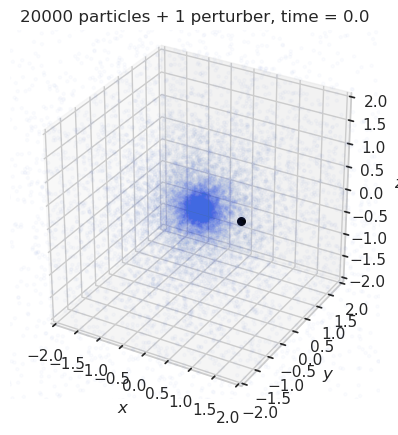

In [147]:
from matplotlib import animation
from tqdm.notebook import tqdm
from IPython.display import HTML

plt.rcParams['animation.embed_limit'] = 100.0  # Imposta il limite a 50 MB o a un valore più grande se necessario

def update(num):
    global N    #N_particles
    l = 2
    ax.clear()
    
    ax.scatter(x[1:,num], y[1:,num], z[1:,num], color = 'royalblue', s = 5 ,alpha = .02)        # Updating Point Location
    ax.scatter(x[0,num], y[0,num], z[0,num], color = 'black', s = 30)
    
    ax.set_title(f'{N-1} particles + 1 perturber, time = {round(time[num],1)}')
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_zlabel(r'$z$')
    
    ax.set_xlim(-l, l)
    ax.set_ylim(-l, l)
    ax.set_zlim(-l, l)
    

## Plotting the Animation
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set(aspect='equal')
line_ani = animation.FuncAnimation(fig, update, interval=50,   
                                   frames=tqdm(range(len(time) - 1)));

HTML(line_ani.to_jshtml())
line_ani.save(f'Jaffe_{N-1}_perturber.gif')